In [1]:
import pandas as pd
import os
import json
import numpy as np

In [2]:
df = pd.DataFrame(columns=["Name", "best validation loss", "best epoch", "tot epoch", "mean(loss[-5:])",
                           "criterion", "unet_weights", "resnet_weights", "resnet_trainable", "augmentation",
                           "batch_size", "do_batch_norm", "adam_regul_factor", "no_dropout", "learning_rate", 
                           "lr_sch_patience", "latent_shape", "dropout_conv", "resnet_no_sigmoid_activation",
                           "resnet_fc_cutoff"])

In [3]:
def append_data_to_dataframe(df, parent, ignore_keys):

    dirs = os.listdir(parent)
    for training in dirs:
        path = os.path.join(parent, training)
        json_path = os.path.join(path, "args.json")

        if not os.path.exists(json_path):
            continue

        with open(json_path) as file:
            config = json.load(file)
        config["Name"] = training
        
        try:
            loss_val = np.load(os.path.join(path, "_loss_val.npy"))
            config["best validation loss"] = np.min(loss_val)
            config["best epoch"] = np.argmin(loss_val) + 1
            config["tot epoch"] = len(loss_val)
            config["mean(loss[-5:])"] = np.mean(loss_val[-5:])
        except:
            pass
        for ig_key in ignore_keys:
            config.pop(ig_key, None)
        df = df.append(config, ignore_index=True)
    return df

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
parent = "_full_training"
ignore_keys = ["feature_shape", "resnet_out_shape", "unet_trainable", "path_prefix", 
              "endnet_minimal", "early_stopping", "epochs", "absolute_training_size", "cuda_device", 
              "get_abbrev_only", "get_path_only", "get_cuda_device_count_only", "no_drop_last", "use_lr_scheduler",
               "path"
              ]

df = append_data_to_dataframe(df, parent, ignore_keys)

In [6]:
parent = "_full_training/_early_stopped"
df = append_data_to_dataframe(df, parent, ignore_keys)

In [7]:
parent = "_full_training/_early_stopped/_w00"
df = append_data_to_dataframe(df, parent, ignore_keys)

In [26]:
df.sort_values(by="resnet_weights")

,Name,best validation loss,best epoch,tot epoch,mean(loss[-5:]),criterion,unet_weights,resnet_weights,resnet_trainable,augmentation,batch_size,do_batch_norm,adam_regul_factor,no_dropout,learning_rate,lr_sch_patience,latent_shape,dropout_conv,resnet_no_sigmoid_activation,resnet_fc_cutoff
72,23-09_17-11__b100_e200_BN,1.611644,2,2,891.948410,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/2021-09-23T00:08oresnet18_lr=0.0001_trl=4_e24.ckpt,NaN,NA,100,True,0,NaN,0.001000,10,NaN,NaN,NaN,9
71,23-09_18-29__b100_e200_BN_lrsp10,143.188482,1,1,143.188482,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/2021-09-23T00:08oresnet18_lr=0.0001_trl=4_e24.ckpt,NaN,NA,100,True,0,NaN,0.100000,10,NaN,NaN,NaN,9
62,24-09_08-42_aNA_cCE_b100_e200_BN_lrsp10,1.071487,5,24,1.552312,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/2021-09-23T00:08oresnet18_lr=0.0001_trl=4_e24.ckpt,NaN,NA,100,True,0,NaN,0.001000,10,NaN,NaN,NaN,9
36,23-09_20-07_aNA_cCE_b100_e200_BN_lrsp10,1.322230,184,200,1.340478,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/2021-09-23T00:08oresnet18_lr=0.0001_trl=4_e24.ckpt,NaN,NA,100,True,0,NaN,0.100000,10,NaN,NaN,NaN,9
47,23-09_18-32_aNA_b100_e200_BN_lrsp10,1.608445,42,44,1.612910,NaN,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/2021-09-23T00:08oresnet18_lr=0.0001_trl=4_e24.ckpt,NaN,NA,100,True,0,NaN,0.100000,10,NaN,NaN,NaN,9
0,26-09_03-29_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_doconv,1.266256,27,35,1.316602,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000010,5,64,True,True,9
30,25-09_20-26_aNA_cCEBAL_b100_e50_BN_lr0.01_lrsp5_nosig_fcc9,1.609286,42,50,1.609816,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,NA,100,True,0,False,0.010000,5,NaN,NaN,True,9
32,26-09_16-09_aDAOG_cCEBAL_b100_e200_lr0.0001_lrsp5_es15_nosig_fcc9_mini_ls32_doconv,NaN,NaN,NaN,NaN,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,False,DAOG,100,False,0,False,0.000100,5,32,True,True,9
34,26-09_01-06_aDAOG_cCEBAL_b100_e200_lr0.0001_lrsp5_es_nosig_fcc9_mini_ls64_doconv,1.295638,3,18,1.570662,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000100,5,64,True,True,9
74,25-09_14-03_aNA_cCE_b100_e200_BN_lr1e-05_lrsp20_nosig_fcc9,1.045507,3,3,1.140685,CE,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,NA,100,True,0,False,0.000010,20,NaN,NaN,True,9


In [20]:
df[df.criterion=="CEBAL"][df.learning_rate==0.00001][df.dropout_conv==False][df.resnet_weights=="_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt"].sort_values(by=["best validation loss"])

/tmp/ipykernel_42587/984021380.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.criterion=="CEBAL"][df.learning_rate==0.00001][df.dropout_conv==False][df.resnet_weights=="_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt"].sort_values(by=["best validation loss"])


,Name,best validation loss,best epoch,tot epoch,mean(loss[-5:]),criterion,unet_weights,resnet_weights,resnet_trainable,augmentation,batch_size,do_batch_norm,adam_regul_factor,no_dropout,learning_rate,lr_sch_patience,latent_shape,dropout_conv,resnet_no_sigmoid_activation,resnet_fc_cutoff
48,26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv,1.261139,20,33,1.286259,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.00001,5,64,False,True,9
14,26-09_11-53_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls32_nodoconv,1.262391,25,35,1.284143,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.00001,5,32,False,True,9
50,26-09_13-26_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es_nosig_nodo_fcc9_mini_ls32_nodoconv,1.263096,19,31,1.316480,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,True,0,True,0.00001,5,32,False,True,9
23,26-09_06-34_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es_nosig_nodo_fcc9_mini_ls64_nodoconv,1.274618,15,27,1.334844,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,True,0,True,0.00001,5,64,False,True,9
52,26-09_23-09_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es15_nosig_fcc9_mini_ls32_nodoconv,1.345433,88,103,1.358926,CEBAL,_trainings/25-09_13-01_aDAOG_cB3D_b24_e200_BN_lrstep100-120-140-160-180/unet_e130.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,False,DAOG,100,True,0,False,0.00001,5,32,False,True,9


In [22]:
df[df.criterion=="CEBAL"][df.resnet_weights=="_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt"].sort_values(by=["best validation loss"])

/tmp/ipykernel_42587/3961724522.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.criterion=="CEBAL"][df.resnet_weights=="_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt"].sort_values(by=["best validation loss"])


,Name,best validation loss,best epoch,tot epoch,mean(loss[-5:]),criterion,unet_weights,resnet_weights,resnet_trainable,augmentation,batch_size,do_batch_norm,adam_regul_factor,no_dropout,learning_rate,lr_sch_patience,latent_shape,dropout_conv,resnet_no_sigmoid_activation,resnet_fc_cutoff
48,26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv,1.261139,20,33,1.286259,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000010,5,64,False,True,9
14,26-09_11-53_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls32_nodoconv,1.262391,25,35,1.284143,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000010,5,32,False,True,9
50,26-09_13-26_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es_nosig_nodo_fcc9_mini_ls32_nodoconv,1.263096,19,31,1.316480,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,True,0,True,0.000010,5,32,False,True,9
37,26-09_10-25_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls32_doconv,1.264279,25,33,1.281703,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000010,5,32,True,True,9
0,26-09_03-29_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_doconv,1.266256,27,35,1.316602,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000010,5,64,True,True,9
19,26-09_01-54_aDAOG_cCEBAL_b100_e200_lr0.0001_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv,1.270762,3,18,1.623373,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000100,5,64,False,True,9
6,26-09_08-40_aDAOG_cCEBAL_b100_e200_lr0.0001_lrsp5_es_nosig_fcc9_mini_ls32_nodoconv,1.270980,4,19,1.539139,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,False,0,False,0.000100,5,32,False,True,9
23,26-09_06-34_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es_nosig_nodo_fcc9_mini_ls64_nodoconv,1.274618,15,27,1.334844,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,True,0,True,0.000010,5,64,False,True,9
58,26-09_09-34_aDAOG_cCEBAL_b100_e200_BN_lr0.0001_lrsp5_es_nosig_nodo_fcc9_mini_ls32_nodoconv,1.280715,4,18,1.984879,CEBAL,_trainings/22-09_17-30_aDAOG_cB3D_b24_e200_BN_lr0.01_lrsp10/unet_e200.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,True,DAOG,100,True,0,True,0.000100,5,32,False,True,9
27,26-09_18-16_aDAOG_cCEBAL_b100_e200_BN_lr0.0001_lrsp5_es15_nosig_fcc9_mini_ls32_nodoconv,1.291251,49,64,1.303098,CEBAL,_trainings/25-09_13-01_aDAOG_cB3D_b24_e200_BN_lrstep100-120-140-160-180/unet_e130.ckpt,_weights/balanced_BCEwLLoss_labels0_resnet18_e12.ckpt,False,DAOG,100,True,0,False,0.000100,5,32,False,True,9


# effect of labels

In [10]:
a = ["_full_training/26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv/",
 "_full_training/26-09_09-35_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv/",
"_full_training/26-09_19-28_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es15_nosig_fcc9_mini_ls64_nodoconv/"
]

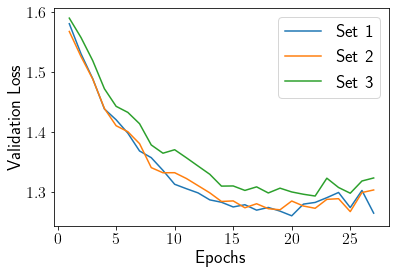

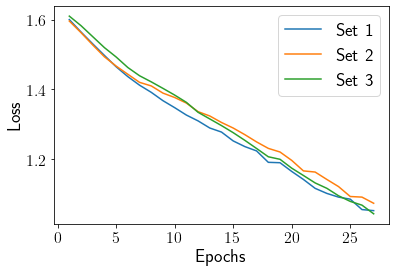

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rc

# latex text in plots
usetex = True
if usetex:
    rc('text', usetex=True)
else:
    rc('text', usetex=False)

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})

min_e = 300
for path in a:
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    if len(loss_val) < min_e:
        min_e = len(loss_val)
min_e
epochs = np.arange(1,min_e+1)
i = 0
for path in a:
    i += 1
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    plt.plot(epochs, loss_val[:min_e], label=f"Set {i}")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
plt.legend()
plt.savefig("images/full_net_label_comparison_lossval.pdf", bbox_inches='tight')

plt.figure()
i = 0
for path in a:
    i += 1
    loss_val = np.load(os.path.join(path, "_loss_val.npy"))
    loss = np.load(os.path.join(path, "_loss.npy"))
    plt.plot(epochs, loss[:min_e], label=f"Set {i}")    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.legend()
plt.savefig("images/full_net_label_comparison_loss.pdf", bbox_inches='tight')

# effect of batch normalisation

In [15]:
a = ["26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv",
    "26-09_06-34_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es_nosig_nodo_fcc9_mini_ls64_nodoconv"
]
label = ["No BN but Dropout", "BN but no Dropout"]

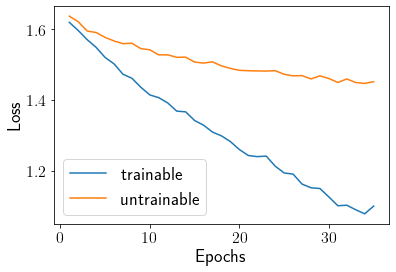

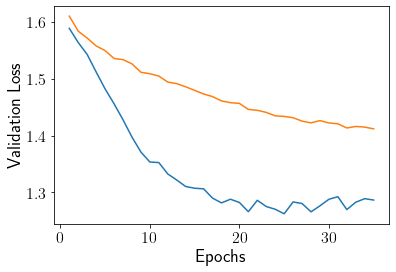

In [30]:
def plot(a, label, save_names=[]):
    min_e = 300
    for path in a:
        path = os.path.join("_full_training/", path)
        loss_val = np.load(os.path.join(path, "_loss_val.npy"))
        loss = np.load(os.path.join(path, "_loss.npy"))
        if len(loss_val) < min_e:
            min_e = len(loss_val)
    min_e
    epochs = np.arange(1,min_e+1)
    
    plt.figure()
    i = 0
    for path in a:
        path = os.path.join("_full_training/", path)
        loss_val = np.load(os.path.join(path, "_loss_val.npy"))
        loss = np.load(os.path.join(path, "_loss.npy"))
        plt.plot(epochs, loss[:min_e], label=label[i])    
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        i += 1
    plt.legend()
    if len(save_names)>1:
        plt.savefig(f"images/{save_names[1]}.pdf", bbox_inches='tight')
    
    plt.figure()
    i = 0
    for path in a:
        path = os.path.join("_full_training/", path)
        loss_val = np.load(os.path.join(path, "_loss_val.npy"))
        loss = np.load(os.path.join(path, "_loss.npy"))
        plt.plot(epochs, loss_val[:min_e], label=label[i])
        plt.xlabel("Epochs")
        plt.ylabel("Validation Loss")
        i += 1
    #plt.legend()
    if len(save_names)>0:
        plt.savefig(f"images/{save_names[0]}.pdf", bbox_inches='tight')
    
plot(a,label)

# effect of dropout in conv part

In [31]:
a = ["26-09_05-02_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_nodoconv",
    "26-09_03-29_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls64_doconv"
]
label = ["No Conv Dropout", "Conv Dropout"]

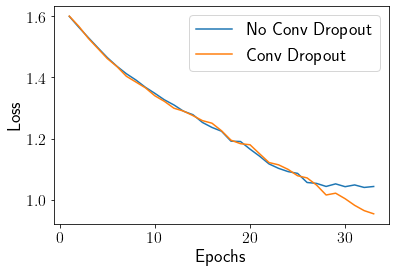

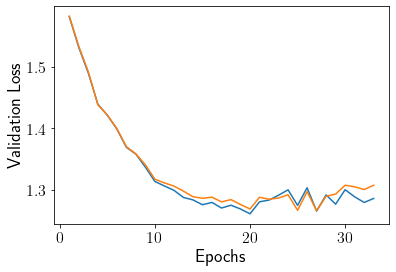

In [32]:
plot(a,label)

# effect of resnet trainable

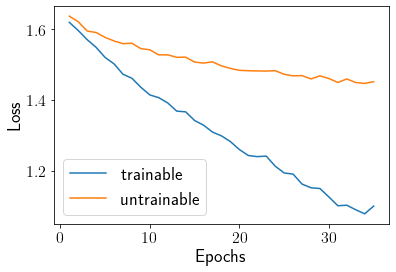

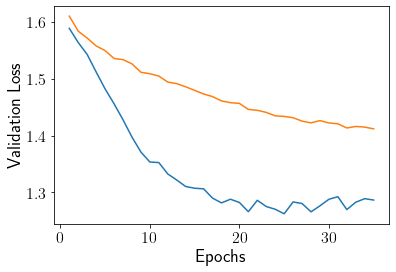

In [33]:
a = ["26-09_11-53_aDAOG_cCEBAL_b100_e200_lr1e-05_lrsp5_es_nosig_fcc9_mini_ls32_nodoconv",
"26-09_23-09_aDAOG_cCEBAL_b100_e200_BN_lr1e-05_lrsp5_es15_nosig_fcc9_mini_ls32_nodoconv"]
label=["trainable", "untrainable"]
save_images=["full_r_trainable", "full_r_untrainable"]
plot(a,label,save_images)